### P-values and Alpha

***Type 1 Error (False Negative)*** - You erroneously reject the null hypothesis when it is true. (You support the alternative hypothesis, when it is not true.)

***Type 2 Error (False Negative)*** - You erroneously fail to reject the null hypothesis when it is not true. (You do not support the alternative hypothesis when it is true.)

For any test, you must consider whether a Type 1 or Type 2 Error is more problematic.  Knowing this will help you define the "significance value" or "alpha level" of your test.  

 p-value (or “calculated probability”) is a measure of the probability that an observed difference/value could have occurred just by random chance.  The lower the p-value, the greater the statistical significance of the observed difference.
After the p-value is calculated, it is compared to the alpha level. 

In simple terms:

***if p < alpha***

We reject the Null Hypothesis and support/accept the Alternative Hypothesis.

***if p > alpha***

We fail to reject the Null Hypothesis.


We want to determine the  probability that someone from the human population would have a height as large as our potential alien (or greater). In other words, what % of the probability (pdf) of our distribution has a height equal to or greater than our potential alien (78 inches)?

In [1]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the Data:

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [5]:
# Define Statistical Metrics:

data = males['Height']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

# Defining the low and high end of the range: 

low = 78
high = max

# Define the range of normal CDF:
x_range  = np.linspace(min, max, 1000)

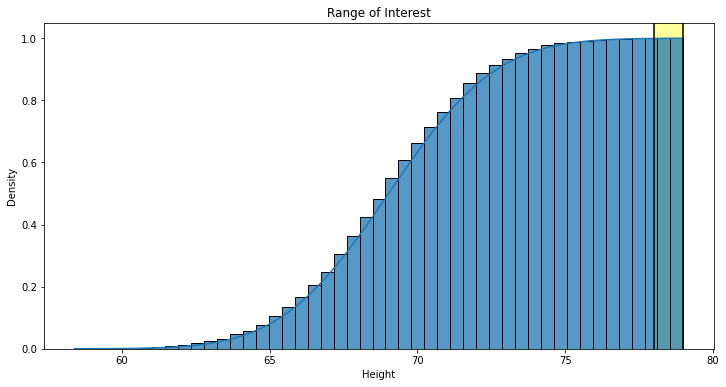

In [10]:
# Plot CDF with our x rnage highlighted:

cdf = stats.norm.cdf(x_range, loc = mean, scale = std)
fig, ax = plt.subplots(figsize = (12,6))

sns.histplot(x = data, stat= 'density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low, color= 'black')
ax.axvline(high, color ='black')
ax.axvspan(low, high, color ='yellow', alpha =0.4, zorder = 0)
ax.set_title('Range of Interest');

In [14]:
# To get eth probability of 78 inches OR taller:

1-stats.norm.cdf(78, loc = np.mean(data), scale = np.std(data))

0.000861409975311811

#### ***As the alpha gets smaller, the likelihood of rejecting the null hypothesis and supporting your alternative goes down.*** 

***if p < alpha***

We reject the Null Hypothesis and support/accept the Alternative Hypothesis.

***if p > alpha***

We fail to reject the Null Hypothesis.

### ***our p-value of .0008 is less than , so we reject the null hypothesis***